<a href="https://colab.research.google.com/github/ShivaniDM/Wild-Blueberry-Prediction-using-Lasso-Regression/blob/main/BlueberryV2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

---



In [3]:
#importing libraries 
import numpy as np 
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

## Preprocessing

---



In [4]:
#loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Wild Blueberry Data and Notebook/Data in Brief/WildBlueberryPollinationSimulationData.csv')

In [5]:
# Preview the first 5 lines of the loaded data 
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [6]:

data.shape

(777, 18)

In [7]:
data.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [8]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [9]:
# using isnull() function  
data.isnull()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
775,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## EDA

---



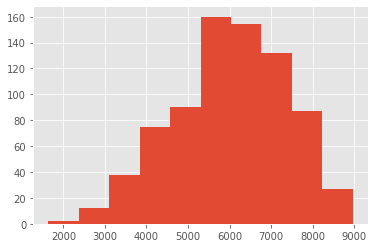

In [10]:

plt.hist(data['yield'])
plt.show()

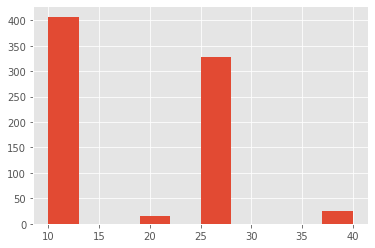

In [11]:
plt.hist(data['clonesize'])
plt.show()


In [45]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['AverageRainingDays'].mean () + data['AverageRainingDays'].std () * factor
lower_lim = data['AverageRainingDays'].mean () - data['AverageRainingDays'].std () * factor

data = data[(data['AverageRainingDays'] < upper_lim) & (data['AverageRainingDays'] > lower_lim)]

In [33]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['bumbles'].mean () + data['bumbles'].std () * factor
lower_lim = data['bumbles'].mean () - data['bumbles'].std () * factor

data = data[(data['bumbles'] < upper_lim) & (data['bumbles'] > lower_lim)]

In [32]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['osmia'].mean () + data['osmia'].std () * factor
lower_lim = data['osmia'].mean () - data['osmia'].std () * factor

data = data[(data['osmia'] < upper_lim) & (data['osmia'] > lower_lim)]

In [ ]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['osmia'].mean () + data['osmia'].std () * factor
lower_lim = data['osmia'].mean () - data['osmia'].std () * factor

data = data[(data['osmia'] < upper_lim) & (data['osmia'] > lower_lim)]

In [31]:

#removing outlier from clonesize column

from scipy import stats
data[(np.abs(stats.zscore(data['clonesize'])) < 3)]

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,755,25.0,0.50,0.380,0.630,0.500,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.494678,0.429703,34.784888,6292.960756
756,756,25.0,0.50,0.380,0.630,0.500,69.7,42.1,58.2,50.2,24.3,41.2,1.00,0.10,0.502842,0.430369,35.185971,6374.444297
757,757,25.0,0.50,0.380,0.630,0.500,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.513889,0.458966,37.209554,6180.951419
758,758,25.0,0.50,0.380,0.630,0.500,77.4,46.8,64.7,55.8,27.0,45.8,34.00,0.56,0.496826,0.447096,35.756223,5700.243243


                          Row#  clonesize  ...     seeds     yield
Row#                  1.000000   0.446992  ... -0.026626  0.017885
clonesize             0.446992   1.000000  ... -0.508722 -0.523057
honeybee              0.698670   0.827447  ... -0.373914 -0.350664
bumbles               0.514631   0.023089  ...  0.296402  0.262293
andrena               0.524851  -0.003359  ...  0.060706  0.132340
osmia                 0.471230  -0.137625  ...  0.306257  0.360135
MaxOfUpperTRange     -0.037325   0.031857  ... -0.021341 -0.180873
MinOfUpperTRange     -0.037339   0.031890  ... -0.020461 -0.180249
AverageOfUpperTRange -0.037387   0.031924  ... -0.019533 -0.179581
MaxOfLowerTRange     -0.037338   0.031887  ... -0.020526 -0.180294
MinOfLowerTRange     -0.037333   0.031875  ... -0.020859 -0.180531
AverageOfLowerTRange -0.037291   0.031896  ... -0.020284 -0.180132
RainingDays           0.015431  -0.015558  ... -0.536697 -0.587042
AverageRainingDays    0.016681  -0.016684  ... -0.550611 -0.60

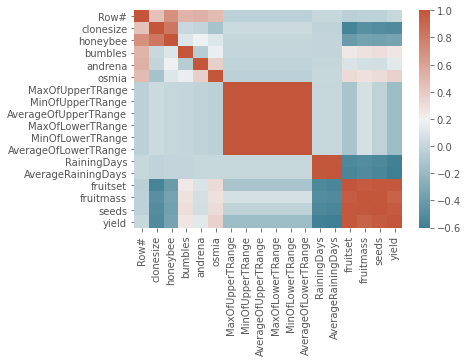

In [34]:
# calculate correlation matrix
corr = data.corr()
print(corr)
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,  cmap=sns.diverging_palette(220, 20, as_cmap=True))

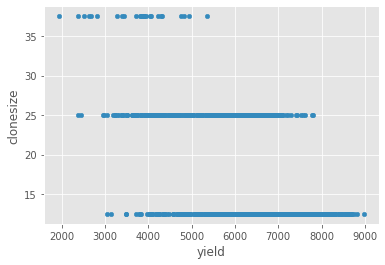

In [35]:
data.plot(kind='scatter', x='yield', y='clonesize')

## Model 

---



In [81]:
# importing libraries
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [82]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,
random_state=40)
print(Xtrain.shape)
print(Xtest.shape)

(531, 15)
(228, 15)


In [83]:

## Build the lasso model with alpha

model_lasso = Lasso(alpha=1,normalize=True)
model_lasso.fit(Xtrain, ytrain)
pred_train_lasso= model_lasso.predict(Xtrain)
pred_test_lasso= model_lasso.predict(Xtest)

In [84]:
## Evaluate the lasso model
print(np.sqrt(mean_squared_error(ytrain,pred_train_lasso)))
print(r2_score(ytrain, pred_train_lasso))
print(np.sqrt(mean_squared_error(ytest,pred_test_lasso)))
print(r2_score(ytest, pred_test_lasso))

147.47373238495047
0.9874705361914587
149.54147030505294
0.988301312987898


In [85]:
## Tunning lasso regression model

from numpy import arange
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from sklearn.linear_model import LassoCV


#load the dataset 
# split data into features and target 
X = data.drop(['yield','AverageOfUpperTRange','AverageOfLowerTRange'], axis = 1)
y = data['yield'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,
random_state=40)

## define model evaluation method
cross_validation = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

## define model

lasso_model = LassoCV(alphas=arange(0, 1, 0.02), normalize= True, cv=cross_validation , n_jobs=-1)

## fit model
lasso_model .fit(Xtrain, ytrain)
## summarize chosen configuration
print('alpha: %f' % lasso_model .alpha_)

pred_train_lasso= lasso_model .predict(Xtrain)
pred_test_lasso= lasso_model .predict(Xtest)



print(np.sqrt(mean_squared_error(ytrain,pred_train_lasso)))
print(r2_score(ytrain, pred_train_lasso))
print(np.sqrt(mean_squared_error(ytest,pred_test_lasso)))
print(r2_score(ytest, pred_test_lasso))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3334543.0858972073, tolerance: 83568.89299621833
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3361912.279211998, tolerance: 83875.79338270811
  tol, rng, random, positive)
/usr/local/

alpha: 0.000000
116.49603713423717
0.9921814638854002
128.44863560870007
0.9913687674023486


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3113831.874537587, tolerance: 81262.1571910485
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3319127.583699703, tolerance: 82495.46070458804
  tol, rng, random, positive)
/usr/local/li